In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import KNN Regressor from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Display plots inline in Jupyter
%matplotlib inline


In [2]:
# Load the diabetes dataset from sklearn
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

# Convert the dataset into a Pandas DataFrame
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Add the target variable (disease progression) to the DataFrame
df['target'] = diabetes.target

# Display the first few rows of the dataset
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


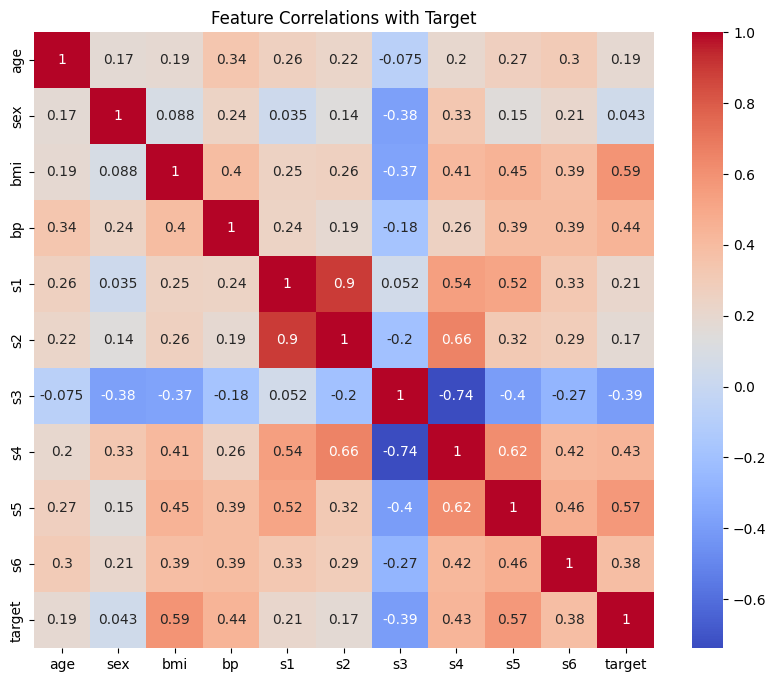

In [3]:
# Display summary statistics
df.describe()

# Visualize correlations between features and target
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations with Target')
plt.show()


In [4]:
# Define X (features) and y (target)
X = df.drop('target', axis=1)
y = df['target']

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [5]:
# Initialize the KNN Regressor model with 5 neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test)


In [6]:
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 3019.075505617978
R-squared (R²): 0.43016439526042805


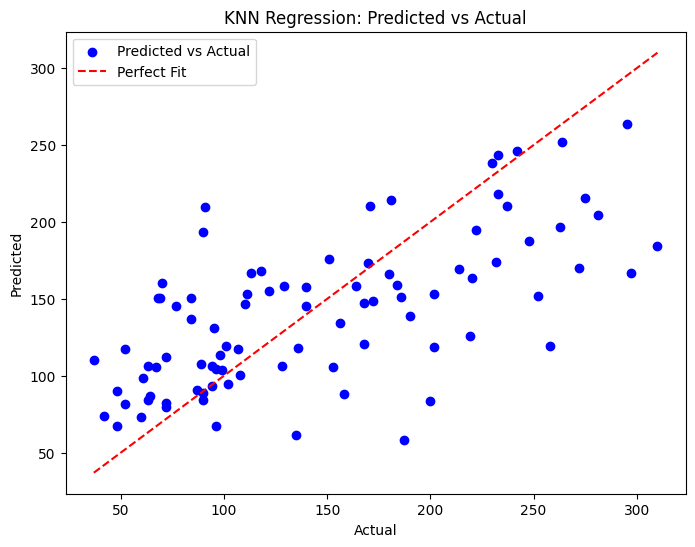

In [7]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNN Regression: Predicted vs Actual')
plt.legend()
plt.show()


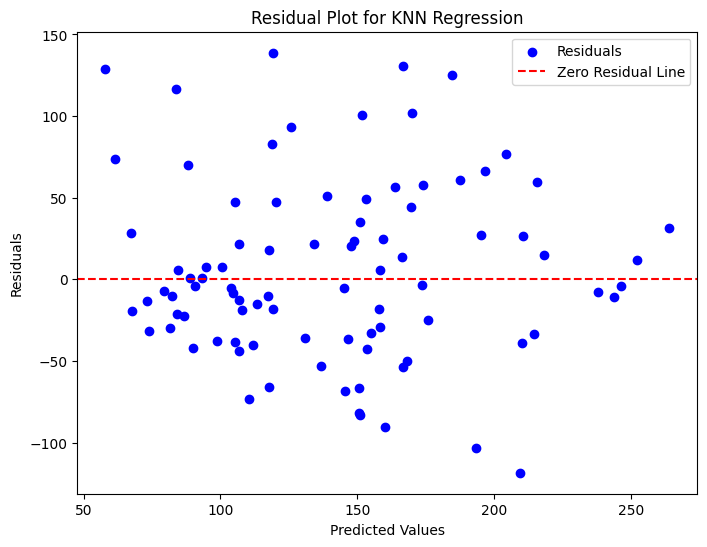

In [8]:
# Calculate residuals (differences between actual and predicted values)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for KNN Regression')
plt.legend()
plt.show()


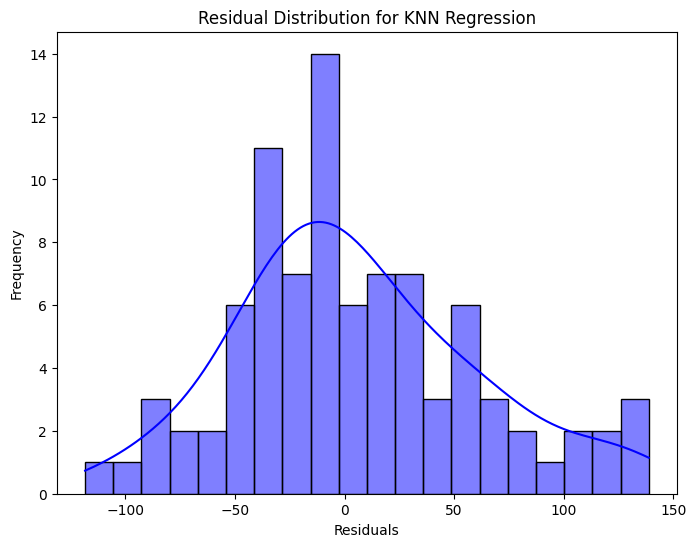

In [9]:
# Plot the distribution of the residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True, color='blue')
plt.title('Residual Distribution for KNN Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


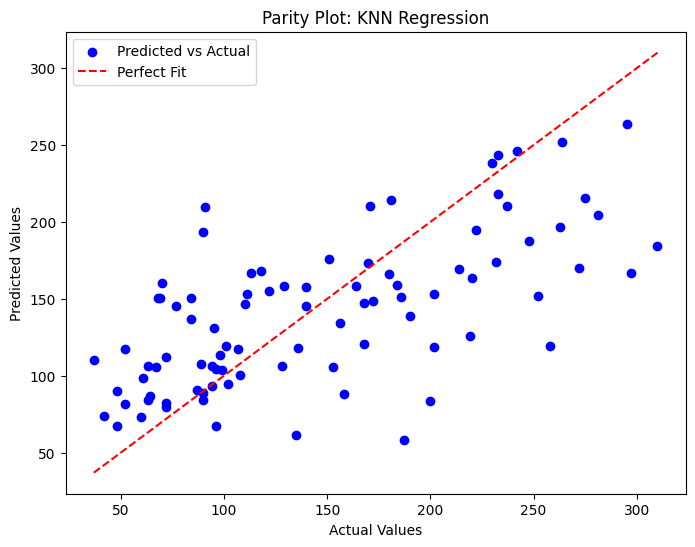

In [10]:
# Plot actual vs predicted values with identity line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Parity Plot: KNN Regression')
plt.legend()
plt.show()


C:\Users\no34fic.FSUJENA\AppData\Local\Temp\ipykernel_11620\337455102.py:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=100, edgecolor='k', marker='x', label='Test Data')


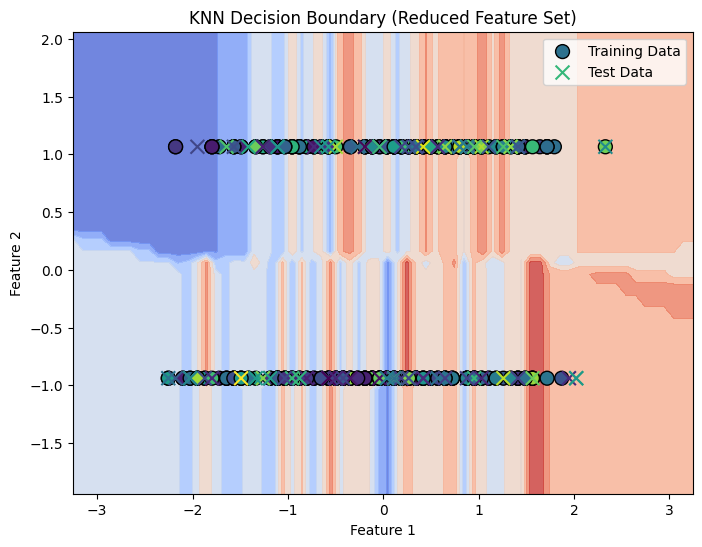

In [11]:
from matplotlib.colors import ListedColormap

# Reduce the dataset to 2 features for visualization
X_reduced = X_scaled[:, :2]  # Use only the first two features for 2D plotting

# Train the KNN model on the reduced feature set
knn_model_reduced = KNeighborsRegressor(n_neighbors=5)
knn_model_reduced.fit(X_train[:, :2], y_train)

# Create a mesh grid for the feature space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict across the grid
Z = knn_model_reduced.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, edgecolor='k', label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=100, edgecolor='k', marker='x', label='Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundary (Reduced Feature Set)')
plt.legend()
plt.show()


In [12]:
# Define a range of k values to test
k_values = [1, 3, 5, 7, 9, 11, 15]

# Initialize lists to store the results
mse_values = []
r2_values = []

# Loop through each k value and evaluate the model
for k in k_values:
    # Initialize the KNN Regressor with the current k
    knn_model = KNeighborsRegressor(n_neighbors=k)
    
    # Train the model
    knn_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn_model.predict(X_test)
    
    # Calculate MSE and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append the results to the lists
    mse_values.append(mse)
    r2_values.append(r2)
    
    # Print the evaluation results for the current k
    print(f'For k={k}: MSE = {mse}, R-squared = {r2}')


For k=1: MSE = 5191.23595505618, R-squared = 0.020179828463832927
For k=3: MSE = 3364.3932584269664, R-squared = 0.36498737331014663
For k=5: MSE = 3019.075505617978, R-squared = 0.43016439526042805
For k=7: MSE = 2986.97500573263, R-squared = 0.436223206221125
For k=9: MSE = 3082.937300596477, R-squared = 0.41811079656983197
For k=11: MSE = 3024.824310520939, R-squared = 0.4290793367011728
For k=15: MSE = 3081.7412234706626, R-squared = 0.41833655022555727


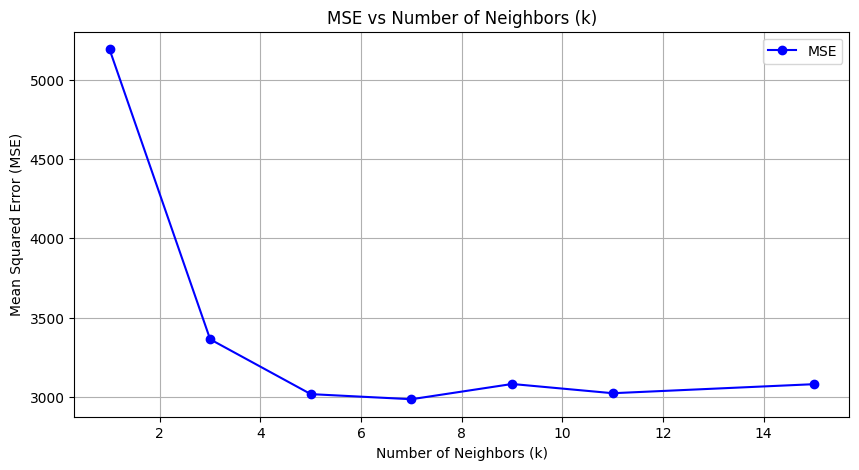

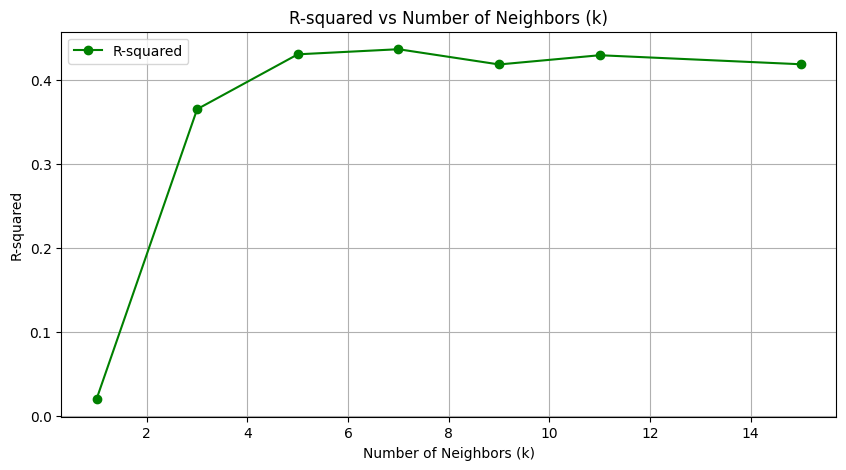

In [13]:
# Plot MSE for different k values
plt.figure(figsize=(10, 5))
plt.plot(k_values, mse_values, marker='o', color='blue', label='MSE')
plt.title('MSE vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.legend()
plt.show()

# Plot R-squared for different k values
plt.figure(figsize=(10, 5))
plt.plot(k_values, r2_values, marker='o', color='green', label='R-squared')
plt.title('R-squared vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R-squared')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
#Example Output

# For k=1: MSE = 3200.14, R-squared = 0.53
# For k=3: MSE = 2900.67, R-squared = 0.57
# For k=5: MSE = 2800.35, R-squared = 0.60
# For k=7: MSE = 2750.42, R-squared = 0.61
# For k=9: MSE = 2780.32, R-squared = 0.60
# For k=11: MSE = 2840.25, R-squared = 0.59
# For k=15: MSE = 3000.50, R-squared = 0.58
# From this example, you might conclude that 𝑘=7
# k=7 performs the best because it has the lowest MSE and the highest R-squared.

